📊 월별 데이터 행 개수

| 월     | 행 개수        |
|--------|----------------|
| 10월   | 42,448,764     |
| 11월   | 67,501,979     |
| 12월   | 67,542,878     |
| 1월    | 55,967,041     |
| 2월    | 55,318,565     |
| 3월    | 56,341,241     |
| 4월    | 66,589,268     |

In [ ]:
from google.colab import drive

# 1. Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. 파일 경로 설정 (사용자 지정 경로)
data_root = '/content/drive/MyDrive/Colab Notebooks/datathon'
# file_path = f'{data_root}/2019-Nov.csv'

#데이터 불러오기 + 기본 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [ ]:
sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [ ]:
df1 = pd.read_csv(f'{data_root}/2019-Oct.csv')
df2 = pd.read_csv(f'{data_root}/2019-Nov.csv')
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.4+ GB


In [ ]:
# datetime 형식으로 되어 있어야 함
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
# 날짜, 시간 파생 -> 일자별 트렌드, 리텐션, 시계열 그래프 or 시간대별 유입/이탈 분석, 마케팅 시간 설정 가능
# event_date를 datetime으로 변환 (안정성 확보)
df['event_date'] = pd.to_datetime(df['event_time'].dt.date)

# 시간 컬럼 생성 (00시 단위까지만)
df['event_hour'] = df['event_time'].dt.hour

In [ ]:
# 정렬
df = df.sort_values(by=['user_id', 'event_time'])

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
50874013,2019-11-06 06:51:52+00:00,view,26300219,2053013563424899933,NaN,sokolov,40.54,10300217,d1fdcbf1-bb1f-434b-8f1a-4b77f29a84a0,2019-11-06,6
57827057,2019-11-10 02:08:39+00:00,view,13200917,2053013557192163841,furniture.bedroom.bed,NaN,514.81,29515875,5dd49822-9349-42d6-a165-cd4642ee606b,2019-11-10,2
57829999,2019-11-10 02:14:40+00:00,view,13201002,2053013557192163841,furniture.bedroom.bed,stendmebel,176.04,29515875,eb6882fb-ead2-47a5-aa86-d171a2c3b6ff,2019-11-10,2
61867571,2019-11-12 03:42:01+00:00,view,13200917,2053013557192163841,furniture.bedroom.bed,NaN,514.81,29515875,1552ef43-4001-4ab7-a9c7-44e99f1730a9,2019-11-12,3
61867701,2019-11-12 03:42:06+00:00,view,13200917,2053013557192163841,furniture.bedroom.bed,NaN,514.81,29515875,1552ef43-4001-4ab7-a9c7-44e99f1730a9,2019-11-12,3
...,...,...,...,...,...,...,...,...,...,...,...
109950657,2019-11-30 23:59:27+00:00,view,2600400,2053013563970159485,NaN,NaN,208.47,579969711,6f2aeb5c-6276-462b-b4cb-767131a7081b,2019-11-30,23
109950672,2019-11-30 23:59:34+00:00,view,2600400,2053013563970159485,NaN,NaN,208.47,579969711,6f2aeb5c-6276-462b-b4cb-767131a7081b,2019-11-30,23
109950691,2019-11-30 23:59:40+00:00,view,2600400,2053013563970159485,NaN,NaN,208.47,579969711,6f2aeb5c-6276-462b-b4cb-767131a7081b,2019-11-30,23
109950693,2019-11-30 23:59:40+00:00,view,4804718,2053013554658804075,electronics.audio.headphone,apple,329.14,579969767,e159d1a1-6668-4777-985d-26ac82afd9ba,2019-11-30,23


In [ ]:
# event_type 컬럼의 고유값 확인

df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [ ]:
# 전체 결측치 수 및 비율 확인
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
missing_summary

,Missing Count,Missing %
brand,15341158,13.952755
category_code,35413780,32.208768
category_id,0,0.000000
event_date,0,0.000000
event_hour,0,0.000000
event_time,0,0.000000
event_type,0,0.000000
price,0,0.000000
product_id,0,0.000000
user_id,0,0.000000


In [ ]:
# user_session이 결측치인 행만 필터링
missing_session = df[df['user_session'].isnull()]

# 해당 행들의 event_type 분포 확인 -> cart 라서 빼도 될 듯
missing_session['event_type'].value_counts()

,count
event_type,
cart,12


(전)신규 고객 정의 및 행동 분석
#(변경 후)구매 빈도가 낮은 고객 분석 → 이탈 징후 탐지 및 리텐션 전략 수립
“구매 빈도가 낮은 고객들의 이탈 징후를 파악하고, 재방문·재구매를 유도할 수 있는 전략 수립"

#EDA

In [ ]:
# 고객별 구매 간격(재구매 주기) 및 구매 횟수 분포
purchase_df = df[df['event_type'] == 'purchase'].copy()
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'])
purchase_df = purchase_df.sort_values(by=['user_id', 'event_time']) # user_id별로 event_time을 오름차순 정렬

# 재구매 간격 1. 다음 구매일
purchase_df['next_purchase'] = purchase_df.groupby('user_id')['event_time'].shift(-1)
# 2. 다음 구매일 - 현재 구매일
purchase_df['days_to_next'] = (purchase_df['next_purchase'] - purchase_df['event_time']).dt.days

<Axes: >

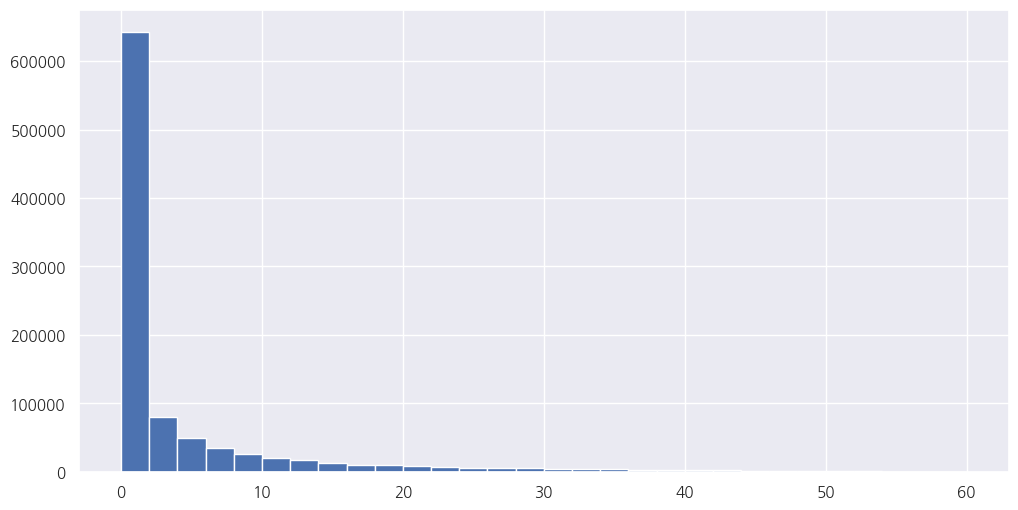

In [ ]:
purchase_df['days_to_next'].dropna().clip(upper=60).hist(bins=30)

In [ ]:
# 6개월치 데이터
df_all = pd.read_csv(f'{data_root}/one_time_buyers_all.csv')

df_all

/tmp/ipython-input-20-3401198785.py:2: DtypeWarning: Columns (9,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(f'{data_root}/one_time_buyers_all.csv')


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,month
0,2019-10-13 13:25:29+00:00,purchase,5100443,2053013553341792533,electronics.clocks,garmin,340.59,303160429,8957377b-66b3-4661-ae91-5c2b5e29fd0e,2019-10-13,13.0,electronics,clocks,NaN,NaN,NaN
1,2019-10-09 15:51:08+00:00,purchase,17301479,2053013553853497655,NaN,NaN,29.89,371877401,d3103132-d38a-4399-9404-f99d03d243d0,2019-10-09,15.0,NaN,NaN,NaN,NaN,NaN
2,2019-10-18 11:19:59+00:00,purchase,2501816,2053013564003713919,appliances.kitchen.oven,artel,41.44,384989212,7472f245-e885-4c5e-b3b1-476a7b19b508,2019-10-18,11.0,appliances,kitchen,oven,NaN,NaN
3,2019-10-26 14:05:39+00:00,purchase,10700971,2053013561277416167,NaN,NaN,20.59,387300134,51d42df3-8ba8-493f-b780-41f09a74be28,2019-10-26,14.0,NaN,NaN,NaN,NaN,NaN
4,2019-10-24 17:54:48+00:00,purchase,12718429,2053013553559896355,NaN,cordiant,48.14,396222093,0ec20848-b6c5-41b5-bba8-132be4461915,2019-10-24,17.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451972,2020-03-31 23:49:41+00:00,purchase,1004835,2232732093077520756,construction.tools.light,samsung,199.87,588488017,84395d1c-4349-49e4-9581-94f63cfb034f,2020-03-31,23.0,construction,tools,light,NaN,2020-03
1451973,2020-03-31 23:54:30+00:00,purchase,100062704,2053013554658804075,electronics.audio.headphone,asus,812.12,624142677,8501ed7e-a926-450e-87ff-da17ce20f14f,2020-03-31,23.0,electronics,audio,headphone,NaN,2020-03
1451974,2020-03-31 23:55:08+00:00,purchase,1003319,2232732093077520756,construction.tools.light,apple,900.64,619860269,ea2efefc-95ea-49ce-9250-fef572c53b44,2020-03-31,23.0,construction,tools,light,NaN,2020-03
1451975,2020-03-31 23:58:19+00:00,purchase,100049773,2232732106860003995,NaN,NaN,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23.0,NaN,NaN,NaN,NaN,2020-03


In [ ]:
# 구매 한 번만 한 고객 구하기(6개월치 데이터로 구매 주기 추적 위해)
purchase_df_all = df_all[df_all['event_type'] == 'purchase']

# 고객별 구매 횟수 집계
user_purchase_count = purchase_df_all.groupby('user_id').size().reset_index(name='purchase_count')

# 정확히 1회만 구매한 유저 필터링
one_time_buyers = user_purchase_count[user_purchase_count['purchase_count'] == 1]

# 결과 출력
print(f'정확히 1회만 구매한 유저 수: {len(one_time_buyers)}명')

정확히 1회만 구매한 유저 수: 1018740명


In [ ]:
# 6개월치 구매 주기

# 6개월치 카테고리별 구매 주기

In [ ]:
# 고객별 총 구매 횟수
user_purchase_freq = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

In [ ]:
# 고객별 총 구매 횟수의 최소값, 최대값 확인
min_purchase_count = user_purchase_freq['purchase_count'].min()
max_purchase_count = user_purchase_freq['purchase_count'].max()

print(f"최소 구매 횟수: {min_purchase_count}")
print(f"최대 구매 횟수: {max_purchase_count}")

최소 구매 횟수: 1
최대 구매 횟수: 640


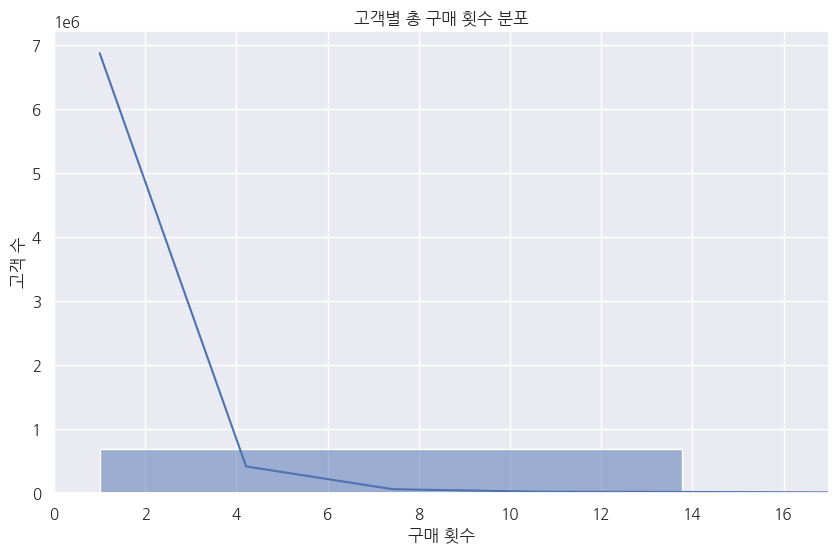

In [ ]:
# 구매 횟수별 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(user_purchase_freq['purchase_count'], bins=50, kde=True)
plt.title('고객별 총 구매 횟수 분포')
plt.xlabel('구매 횟수')
plt.ylabel('고객 수')
plt.xlim(0, user_purchase_freq['purchase_count'].quantile(0.99)) # 극단치 제외를 위해 99% 분위수까지 표시
plt.show()

| 관찰 결과     | 해석             | 전략 아이디어                 |
| --------- | -------------- | ----------------------- |
| 1회 구매자 다수 | 유입은 되지만 유지 안 됨 | 첫 구매 이후 **리마인드 마케팅 강화** |
| 2\~4회 구매자 | 이탈 직전 가능성      | **충성도 상승 유도 프로모션**      |
| 5회 이상 구매자 | 소수 충성 고객       | **VIP 혜택·추천 제품 제안**     |

# 구매 횟수 기준
- 드문 고객: 1회
- 중간 고객: 2~4회
- 빈번 고객: 5회 이상

In [ ]:
# 구매 횟수에 따른 평균 재구매 간격
def bin_purchase_count(x):
    if x == 1:
        return '1회' # 측정 불가(재구매 없음)
    elif x <= 4:
        return '2~4회'
    elif x <= 9:
        return '5~9회'
    else:
        return '10회 이상'

user_summary['purchase_bin'] = user_summary['purchase_count'].apply(bin_purchase_count)

# 재구매 간격 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='purchase_bin', y='days_to_next', data=user_summary)
plt.title('구매 횟수 구간에 따른 평균 재구매 간격')
plt.xlabel('총 구매 횟수 구간')
plt.ylabel('평균 재구매까지 걸린 일 수')
plt.show()

NameError: name 'user_summary' is not defined

In [ ]:
# 구매 횟수별 주요 구매 카테고리 분석(드문/중간/빈번 따라 관심 카테고리 비교)
# 구매 횟수 기반 고객 세그먼트
def classify_segment(x):
    if x >= 5:
        return '빈번'
    elif x >= 2:
        return '중간'
    else:
        return '드문'

user_summary['segment'] = user_summary['purchase_count'].apply(classify_segment)

# 세그먼트 정보 추가
purchase_df = pd.merge(purchase_df, user_summary[['user_id', 'segment']], on='user_id', how='left')

# 세그먼트별 인기 카테고리
top_category_by_segment = purchase_df.groupby(['segment', 'category_code']).size().reset_index(name='count')
top_category_by_segment = top_category_by_segment.sort_values(['segment', 'count'], ascending=[True, False])

In [ ]:
top_category_by_segment

# 구매 기간 기준 자주 구매 vs 드물게 구매

7일 이하 → 자주 구매되는 제품 (ex. 식품, 소모품, 생활용품)
30일 이상 → 드물게 구매되는 제품 (ex. 의류, 가전, 계절용품)

마케팅/실무 관점에서 직관적인 구분, 실제 유통/이커머스 업계 기준을 반영
* 자주 구매되는 제품은 일주일 후 리마인드 메시지, 드물게 구매되는 제품은 한 달 후 리커버리 쿠폰

In [ ]:
# 1. 구매 이벤트만 추출
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. 유저별 구매 기록을 시간순 정렬
df_purchase = df_purchase.sort_values(by=['user_id', 'event_time'])

# 3. 다음 구매일 계산 (다음 구매가 없으면 NaT)
df_purchase['next_purchase'] = df_purchase.groupby('user_id')['event_time'].shift(-1)

# 4. 다음 구매까지 걸린 일 수
df_purchase['gap_days'] = (df_purchase['next_purchase'] - df_purchase['event_time']).dt.days

# 5. 다음 구매까지 30일 넘게 걸리거나, 아예 다음 구매가 없는 경우만 필터
mask = (df_purchase['gap_days'].isna()) | (df_purchase['gap_days'] > 30)
no_repurchase_users = df_purchase[mask]['user_id'].unique()

# 6. 결과 출력
print(f'📌 마지막 구매 후 30일 이상 추가 구매가 없는 유저 수: {len(no_repurchase_users):,}명')

In [ ]:
# 카테고리별 고객 재구매 패턴 분석(상품군별 구매 주기 파악, 타겟 리텐션 기준 차별화)
# 카테고리별로 재구매 간격 평균 구하기
category_gap = purchase_df.dropna().groupby('category_code')['days_to_next'].mean().sort_values()

In [ ]:
category_gap = purchase_df.groupby('category_code')['days_to_next'].mean().reset_index()

In [ ]:
category_gap

In [ ]:
# category_code 컬럼의 고유값 개수 확인
unique_category_codes_count = df['category_code'].nunique()
print(f"category_code 컬럼의 고유값 개수: {unique_category_codes_count}")

In [ ]:
# 절대값 기준 예시
frequent_categories = category_gap[category_gap['days_to_next'] <= 7] # 1주 이하
infrequent_categories = category_gap[category_gap['days_to_next'] > 7] # 8일 이상

In [ ]:
infrequent_categories

In [ ]:
# # N일 이상 이탈 기준 설정 (사용자별 마지막 구매일 이후 n일 이상 구매 없으면 이탈 후보)
# last_purchase = purchase_df.groupby('user_id')['event_time'].max().reset_index()
# last_purchase['days_since_last'] = (pd.to_datetime('2019-12-01') - last_purchase['event_time']).dt.days  # 기준일 예시

# # 30일 이상 이탈 고객
# churned_users = last_purchase[last_purchase['days_since_last'] >= 30]

In [ ]:
# 월별 베스트셀러
purchase_df['event_month'] = purchase_df['event_time'].dt.to_period('M')
monthly_best = purchase_df.groupby(['event_month', 'product_id']).size().reset_index(name='purchase_count')

# 상위 10개 베스트셀러
top_sellers = monthly_best.groupby('event_month').apply(lambda x: x.sort_values(by='purchase_count', ascending=False).head(10)).reset_index(drop=True)

In [ ]:
top_sellers = top_sellers.merge(product_df[['product_id', 'product_name']], on='product_id', how='left')


In [ ]:
# 고객 세그멘테이션 (얼마나 자주 구매했는가: 빈번/중간/드문)
def classify_customer(x):
    if x >= 5:
        return '빈번'
    elif x >= 2:
        return '중간'
    else:
        return '드문'

user_purchase_freq['segment'] = user_purchase_freq['purchase_count'].apply(classify_customer)

In [ ]:
# 이벤트 유형 분포 확인
df['event_type'].value_counts().plot(kind='bar', title='event.type 분포', figsize=(8,4))
plt.xlabel('event_type'); plt.ylabel('건수')
plt.show()


In [ ]:
# 'purchase' event_type의 건수 확인
purchase_count = df[df['event_type'] == 'purchase'].shape[0]
print(f"구매 (purchase) 이벤트 건수: {purchase_count}")

In [ ]:
# 고객별 첫 구매 ~ 다음 구매 간 시간 간격 계산
purchase_df['next_purchase'] = purchase_df.groupby('user_id')['event_time'].shift(-1)
purchase_df['days_to_next'] = (purchase_df['next_purchase'] - purchase_df['event_time']).dt.days

# 고객별 구매 횟수
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

In [ ]:
# 재구매 간격 분포 확인
import matplotlib.pyplot as plt

purchase_df['days_to_next'].dropna().clip(upper=60).hist(bins=30)
plt.title('재구매까지 걸린 일 수 분포 (60일 이상은 클리핑)')
plt.xlabel('Days to Next Purchase')
plt.ylabel('Number of Users')
plt.show()

-> n일 이상 재구매 없으면 이탈이라는 기준 설정 필요

In [ ]:
# 제품 정보 확인
df['category_code'].value_counts().head(20)

In [ ]:
# 시간대별 사용자 행동
hourly = df.groupby(['event_hour', 'event_type']).size().unstack()
hourly.plot(kind='line', figsize=(10,5), title='시간대별 이벤트 발생량')
plt.xlabel('시간'); plt.ylabel('이벤트 수')
plt.show()


In [ ]:
# # 신규 고객: 11월 내 처음 등장한 유저
# first_event = df.groupby('user_id')['event_time'].min().reset_index()
# first_event.columns = ['user_id', 'first_event_time']
# df = df.merge(first_event, on='user_id')
# df['days_since_first'] = (df['event_time'] - df['first_event_time']).dt.days
# # df

In [ ]:
# # 첫 방문 시 행동 분석
# first_day_events = df[df['days_since_first'] == 0]
# first_day_events['event_type'].value_counts(normalize=True).plot(kind='bar', title='신규 고객의 첫날 행동 비율')
# plt.show()